### Combine all annotations on full UMAP
- all compartments are now annotated at fine grained resolution, combine annotations from csv

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sc.logging.print_header()

scanpy==1.7.1 anndata==0.8.0 umap==0.4.6 numpy==1.20.1 scipy==1.6.1 pandas==1.2.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [2]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/post_scvi20221124/Mes_all.hvg5000_noCC.scvi_output.22021124.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 277891 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_sp

In [11]:
a = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/Mes_AP_annot_v3_new.csv',index_col=0)
b = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/Mes_FT_annot_v3.csv',index_col=0)
c = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/Mes_ST_annot_v3.csv',index_col=0)

In [12]:
a

,annot_v2,annot_v3
index,,
GATGATCCATGACAAA-GSM4600897,S1,Mes_AP_lamina_propria_fibroblast_ADAMDEC1
GTCATTTAGTAGGTGC-HCA_A_GT12934999,S3.KCNN3+,Mes_AP_oesophagus_fibroblast
GTCATTTGTGCTCTTC-HCA_A_GT12935005,Pericytes,Doublets
GAGTCCGAGGGAGTAA-HCA_A_GT12935005,Myofibroblast,Mes_AP_myofibroblast
TGAGAGGTCAGTTAGC-GSM4546322,Pericytes,Mes_AP_pericyte
...,...,...
GCACTCTCAGTCACTA-GSM4766848,Doublets,Doublets
CCTTACGTCATCTGCC-4918STDY7447825,S1,Doublets
GCCATTCTCTTCCTAA-GSM5177037,S3.KCNN3+,Mes_AP_vascular_smooth_muscle


In [13]:
b

,annot_v2,annot_v3
index,,
CGTTGGGAGCCGATTT-HT-243_small-intestine,SMC CSRP1/CAPN3+,Mes_FT_SMC_CAPN3
TCAAGTGCATCGCTAA-HT-260-proximal-SI_day-59,Stromal TMEM176A/B+,Mes_FT_villus_fibroblast_F3
GAAATGAGTCAGCTAT-FCA_gut9456316,Pericyte SULT1E1+,Mes_FT_pericyte
CATATGGGTGACTACT-4918STDY7321513,Mesoderm HAND1+_02,Mes_FT_mesoderm_1
GTCAAGTGTCGGCACT-FCA_gut9456313,SMC CSRP1/CAPN3+,Mes_FT_SMC_CAPN3
...,...,...
CACCGTTCAGGCGTTC-HT-274_fetal_duo_d72,Fibro cycling (G2/M),Mes_AP_cycling_fibroblast
TCTGTCGAGGCCATAG-HT-274_fetal_duo_d72,Fibro cycling (G2/M),Mes_AP_cycling_fibroblast
TATCCTACATAGTCAC-HT-274_fetal_duo_d72,Fibro cycling (G2/M),Mes_AP_cycling_fibroblast


In [14]:
c

,annot_v2,annot_v3
index,,
CAGCATAAGATACACA-HT228-fetal-colon,Stromal ADAM28/HOXA10+,Mes_ST_lamina_propria_fibroblast_ADAMDEC1
CCAGCGACACCTATCC-HT-232_stomach_antrum,Stromal C7/KCNN3+,Mes_ST_crypt_fibroblast_PI16
TGTTCCGCAAGAAGAG-HT-231_esophagus,ICC,Mes_ST_crypt_fibroblast_PI16
GCATGATCATAGACTC-6-Int-Fresh-Sorted,Myofibroblast FNDC1+,Mes_ST_myofibroblast
GACTACAGTTGCGTTA-HT228-fetal-ileum,Fibro SHISA3+,Mes_ST_myofibroblast
...,...,...
AGAATAGAGCAACGGT-Human_colon_16S8159183,Fibro cycling,Mes_ST_cycling_fibroblast
GATCGTACACCCTATC-Human_colon_16S7985395,Fibro cycling,Mes_ST_cycling_fibroblast
GAGTCCGTCTTACCTA-Human_colon_16S7985393,Fibro cycling,Mes_ST_cycling_fibroblast


In [15]:
del a['annot_v2']

In [16]:
del b['annot_v2']

In [17]:
del c['annot_v2']

In [18]:
frames = [a,b,c]

all_annot = pd.concat(frames)

In [19]:
all_annot

,annot_v3
index,
GATGATCCATGACAAA-GSM4600897,Mes_AP_lamina_propria_fibroblast_ADAMDEC1
GTCATTTAGTAGGTGC-HCA_A_GT12934999,Mes_AP_oesophagus_fibroblast
GTCATTTGTGCTCTTC-HCA_A_GT12935005,Doublets
GAGTCCGAGGGAGTAA-HCA_A_GT12935005,Mes_AP_myofibroblast
TGAGAGGTCAGTTAGC-GSM4546322,Mes_AP_pericyte
...,...
AGAATAGAGCAACGGT-Human_colon_16S8159183,Mes_ST_cycling_fibroblast
GATCGTACACCCTATC-Human_colon_16S7985395,Mes_ST_cycling_fibroblast
GAGTCCGTCTTACCTA-Human_colon_16S7985393,Mes_ST_cycling_fibroblast


In [20]:
adata.obs['fine_annot'] = all_annot.annot_v3

In [21]:
adata

AnnData object with n_obs × n_vars = 277891 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_sp

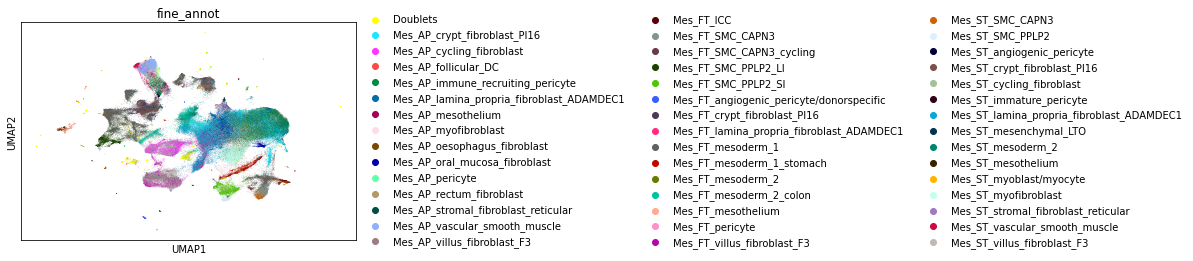

In [22]:
sc.pl.umap(adata,color='fine_annot')

In [26]:
adata.obs['fine_annot'] = (
    adata.obs["fine_annot"]
    .map(lambda x: {'Mes_FT_angiogenic_pericyte/donorspecific':'Mes_FT_angiogenic_pericyte'
    }.get(x, x))
    .astype("category")
)

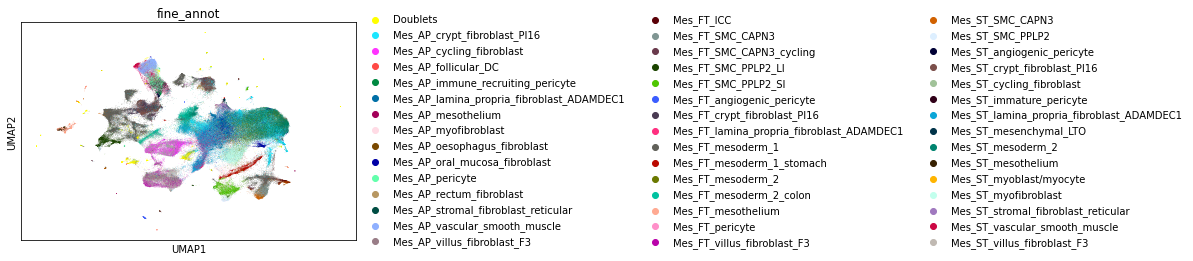

In [27]:
sc.pl.umap(adata,color='fine_annot')

In [28]:
adata.obs['annot_v3_mes'] = adata.obs.fine_annot

In [29]:
adata.obs['annot_v3_mes'] = adata.obs["annot_v3_mes"].str.replace("Mes_AP_","")
adata.obs['annot_v3_mes'] = adata.obs["annot_v3_mes"].str.replace("Mes_FT_","")
adata.obs['annot_v3_mes'] = adata.obs["annot_v3_mes"].str.replace("Mes_ST_","")

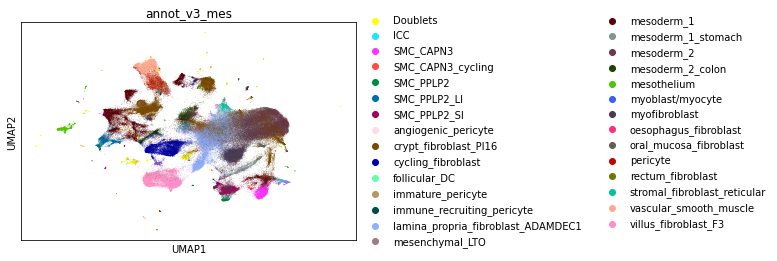

In [30]:
sc.pl.umap(adata,color='annot_v3_mes')

In [33]:
adata.obs['annot_v3_mes_simple'] = (
    adata.obs["annot_v3_mes"]
    .map(lambda x: {
 'SMC_PPLP2_LI':'SMC_PPLP2',
 'SMC_PPLP2_SI':'SMC_PPLP2',
    'mesoderm_1_stomach':'mesoderm_1',
        'mesoderm_2_colon':'mesoderm_2',
         }.get(x, x))
    .astype("category")
)

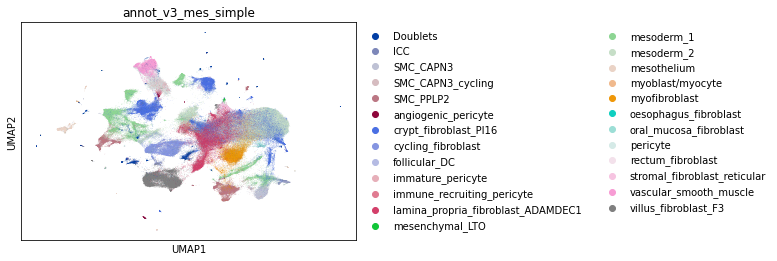

In [34]:
sc.pl.umap(adata,color='annot_v3_mes_simple')

In [35]:
adata.obs['annot_v3'] = adata.obs.fine_annot

In [36]:
annot = adata.obs.loc[:,['annot_v3_mes','annot_v3','annot_v3_mes_simple']]

In [37]:
annot

,annot_v3_mes,annot_v3,annot_v3_mes_simple
index,,,
AAGCATCCACTCCACT-GSM4600896,crypt_fibroblast_PI16,Mes_AP_crypt_fibroblast_PI16,crypt_fibroblast_PI16
AATGCCACAGAAACCG-GSM4600896,crypt_fibroblast_PI16,Mes_AP_crypt_fibroblast_PI16,crypt_fibroblast_PI16
AATGGAATCGGCTGAC-GSM4600896,vascular_smooth_muscle,Mes_AP_vascular_smooth_muscle,vascular_smooth_muscle
AATGGCTCACTGCTTC-GSM4600896,lamina_propria_fibroblast_ADAMDEC1,Mes_AP_lamina_propria_fibroblast_ADAMDEC1,lamina_propria_fibroblast_ADAMDEC1
ACCAACAGTTTGAAAG-GSM4600896,lamina_propria_fibroblast_ADAMDEC1,Mes_AP_lamina_propria_fibroblast_ADAMDEC1,lamina_propria_fibroblast_ADAMDEC1
...,...,...,...
TTCTCCTGTCAGAGGT-GSM5525958,crypt_fibroblast_PI16,Mes_AP_crypt_fibroblast_PI16,crypt_fibroblast_PI16
TTCTTAGCAGACGTAG-GSM5525958,lamina_propria_fibroblast_ADAMDEC1,Mes_AP_lamina_propria_fibroblast_ADAMDEC1,lamina_propria_fibroblast_ADAMDEC1
TTGGAACTCATCGATG-GSM5525958,villus_fibroblast_F3,Mes_AP_villus_fibroblast_F3,villus_fibroblast_F3


In [38]:
annot.to_csv('/nfs/team205/ao15/Megagut/Annotations_v3/compartment_annotations/csv/Mes_all_annot_v3.csv')